In [ ]:
! pip install langgraph-supervisor --q
! pip install langchain_openai langchain_community langchain_experimental --q


In [ ]:
from google.colab import userdata
import os
from dotenv import load_dotenv
load_dotenv() ## load all the environment variables from .env

os.environ['OPENAI_API_KEY'] = os.getenv("OPENAI_API_KEY")
os.environ['TAVILY_API_KEY'] = os.getenv("TAVILY_API_KEY")



In [ ]:

from langchain_openai import ChatOpenAI
model = ChatOpenAI(model="gpt-4o-mini")


In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults
tavily_tool = TavilySearchResults(max_results=5)

from langchain_experimental.tools import PythonREPLTool
python_repl_tool = PythonREPLTool()

In [ ]:
from langgraph.prebuilt import create_react_agent

In [ ]:

def web_search(query: str) -> str:
    """Search the web for information."""
    docs = tavily_tool.invoke({"query": query})
    web_results = "\n".join([d["content"] for d in docs])
    return web_results

research_agent = create_react_agent(
    model=model,
    tools=[web_search],
    name="research_expert",
    prompt="You are a world class researcher with access to web search."
)


visualization_agent = create_react_agent(
    model=model,
    tools=[python_repl_tool],
    name="visualization_expert",
    prompt="You are a visualization expert, create visualization using python code. Always use one tool at a time."
)

In [ ]:
from langgraph_supervisor import create_supervisor

In [ ]:
workflow = create_supervisor(
    [research_agent, visualization_agent],
    model=model,
    prompt=(
        "You are a team supervisor managing a research expert and a visualization expert. "
        "For current events and information, use research_agent."
        "For creating beatiful visualization using use visualization_agent."
    )
)

# Compile and run
app = workflow.compile()

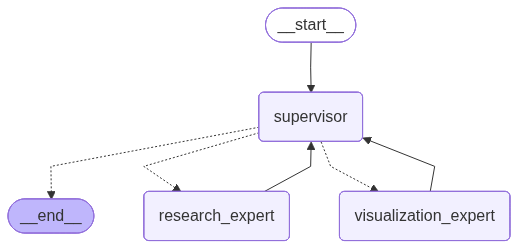

In [ ]:
from IPython.display import Image
display(Image(app.get_graph().draw_mermaid_png()))

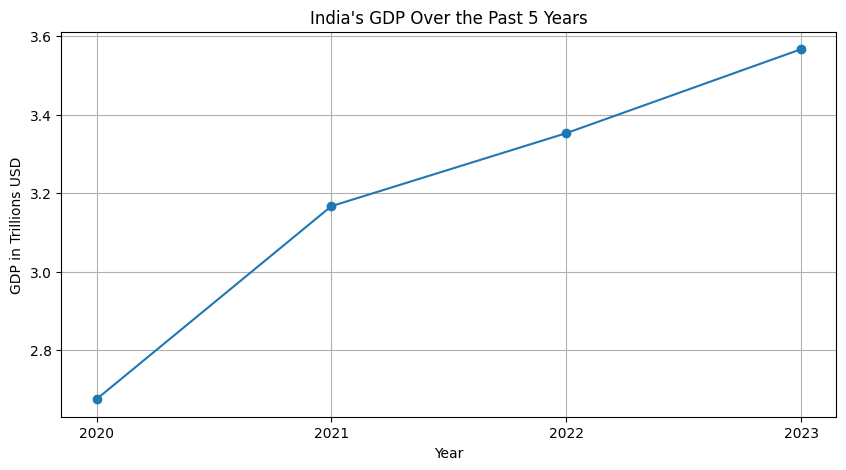

================================ Human Message =================================

Fetch the India's GDP over the past 5 years,then draw a line graph of it.
================================== Ai Message ==================================
Name: supervisor
Tool Calls:
  transfer_to_research_expert (call_KaeVJUSvdLLJaJ7G5HxhMtIz)
 Call ID: call_KaeVJUSvdLLJaJ7G5HxhMtIz
  Args:
================================= Tool Message =================================
Name: transfer_to_research_expert

Successfully transferred to research_expert
================================== Ai Message ==================================
Name: research_expert

I currently don't have the capability to create a graph directly. However, you can easily plot the data using any graphing tool or software. Here's a simple guide to create a line graph depicting India's GDP over the past five years.

### Data to Plot:
- **Years**: 2023, 2022, 2021, 2020
- **GDP (in Trillions USD)**:
  - 2023: 3.567
  - 2022: 3.353
  - 2021:

In [ ]:
result = app.invoke({
    "messages": [
        {
            "role": "user",
            "content": "Fetch the India's GDP over the past 5 years,then draw a line graph of it."
        }
    ]
})


for m in result['messages']:
    m.pretty_print()